## Aplicação CNN - CIFAR-10

- Considere uma rede deep learning convolutiva (treinada) - CNN aplicada à classificação de padrões em imagens.
- A base de dados considerada é a CIFAR-10 (pesquise).
- A referida base de dados consiste de 60 mil imagens coloridas de 32x32 pixels, com 50 mil para treino e 10 mil para teste.
- As imagens estão divididas em 10 classes, a saber: avião,
navio, caminhão, automóvel, sapo, pássaro, cachorro, gato, cavalo e cervo.
- Cada imagem possui apenas um dos objetos da classe de interesse, podendo estar parcialmente obstruído por outros objetos que não pertençam a esse conjunto.
- Apresente os resultados da classificação em uma matriz de confusão.

### Utilizando a Rede ResNet50

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.applications import ResNet50
from tensorflow.keras import models
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
# Carregar o dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar as imagens para valores entre 0 e 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Converter rótulos para one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)

170498071/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
# Classes do CIFAR-10
classes = ['avião', 'automóvel', 'pássaro', 'gato', 'cervo', 'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']

In [ ]:
inputs = tf.keras.Input(shape=(32,32,3))

In [ ]:
resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)

resnet_features = tf.keras.applications.resnet.ResNet50(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)(resize)

In [ ]:
x = tf.keras.layers.GlobalAveragePooling2D()(resnet_features)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)

classification_output = x

model = tf.keras.Model(inputs=inputs,outputs=classification_output)

# compile
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# build model
#tf.keras.backend.clear_session()
#model = construct_model()
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 224, 224, 3)       0         
 g2D)                                                            
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_5 (Dense)             (None, 512)               5248

In [ ]:
# Treinar o modelo
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=True)

Epoch 1/5
782/782 [==============================] - 596s 734ms/step - loss: 0.4799 - accuracy: 0.8394 - val_loss: 1.8749 - val_accuracy: 0.4344
Epoch 2/5
782/782 [==============================] - 570s 728ms/step - loss: 0.1244 - accuracy: 0.9581 - val_loss: 0.2036 - val_accuracy: 0.9308
Epoch 3/5
782/782 [==============================] - 557s 713ms/step - loss: 0.0464 - accuracy: 0.9850 - val_loss: 0.3387 - val_accuracy: 0.9081
Epoch 4/5
782/782 [==============================] - 568s 727ms/step - loss: 0.0181 - accuracy: 0.9959 - val_loss: 0.2526 - val_accuracy: 0.9320
Epoch 5/5
782/782 [==============================] - 569s 728ms/step - loss: 0.0090 - accuracy: 0.9981 - val_loss: 0.2261 - val_accuracy: 0.9421


313/313 [==============================] - 35s 100ms/step


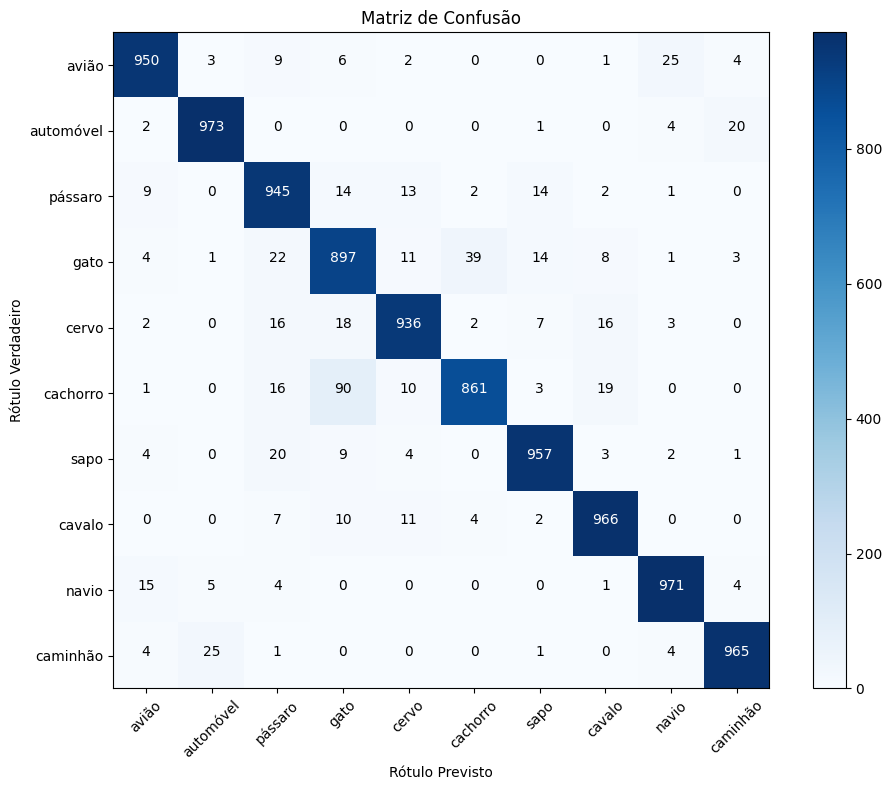

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Função para plotar a matriz de confusão
def plot_confusion_matrix(cm, classes, normalize=False, title='Matriz de Confusão', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Rótulo Verdadeiro')
    plt.xlabel('Rótulo Previsto')
    plt.tight_layout()



# Plotando a matriz de confusão
plot_confusion_matrix(conf_matrix, classes)
plt.show()